Q1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

K-Means Clustering is a partition-based clustering algorithm that divides data into a fixed number of clusters (K). It works by assigning data points to the nearest cluster centroid and then updating centroids iteratively.

Hierarchical Clustering builds a hierarchy of clusters either by merging smaller clusters (agglomerative) or splitting larger clusters (divisive). It does not require the number of clusters in advance.

Differences:
- K-Means requires the number of clusters beforehand, while Hierarchical Clustering does not.
- K-Means is faster and suitable for large datasets, while Hierarchical Clustering is slower and better for small datasets.
- K-Means produces flat clusters, while Hierarchical Clustering produces a tree-like structure (dendrogram).

Use Cases:
- K-Means: Customer segmentation in retail where the number of customer groups is known.
- Hierarchical Clustering: Gene expression analysis where relationships between clusters are important.


Q2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

The Silhouette Score is used to evaluate the quality of clustering results. It measures how similar a data point is to its own cluster compared to other clusters.

The score ranges from -1 to +1:
- A score close to +1 indicates well-separated clusters.
- A score close to 0 indicates overlapping clusters.
- A negative score indicates incorrect clustering.

Thus, the Silhouette Score helps in assessing clustering performance and selecting the optimal number of clusters.


Q3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) has two core parameters:

1. eps (epsilon): Defines the maximum distance between two points to be considered neighbors.
2. min_samples: Minimum number of points required to form a dense region (cluster).

Influence:
- Larger eps results in larger clusters.
- Smaller eps may classify more points as noise.
- Higher min_samples creates stricter cluster formation.

DBSCAN can identify clusters of arbitrary shape and detect outliers effectively.


Q4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Feature scaling is important because clustering algorithms use distance calculations.

Without scaling:
- Features with larger values dominate distance computation.
- Clusters may become biased.

Scaling ensures:
- Equal contribution of all features.
- Accurate distance measurement.
- Improved clustering performance.

Algorithms like K-Means and DBSCAN perform best on scaled data.


Q5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

The Elbow Method is used to find the optimal number of clusters in K-Means.

It plots the number of clusters (K) against the Within-Cluster Sum of Squares (WCSS).
The point where the decrease in WCSS slows down forms an "elbow".

This elbow point indicates the optimal number of clusters where adding more clusters does not significantly improve performance.


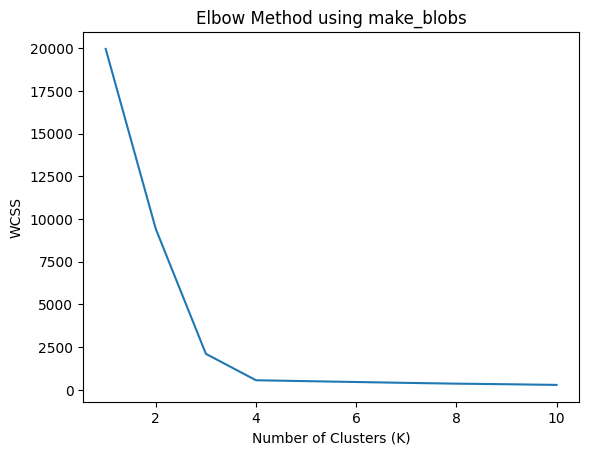

In [1]:
# Q5: Elbow Method using make_blobs dataset

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate dataset
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Elbow Method
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method using make_blobs")
plt.show()


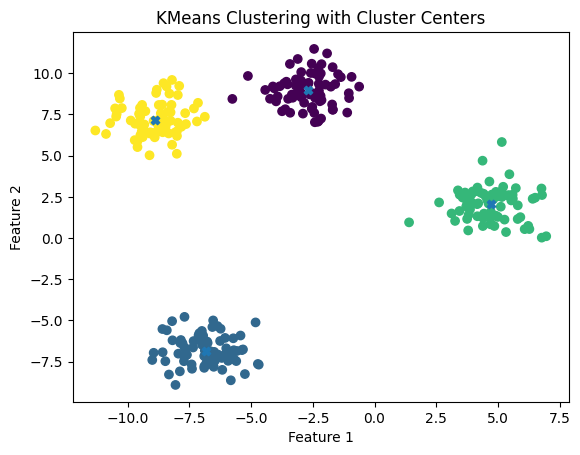

In [2]:
# Q6: KMeans clustering using make_blobs and visualization of cluster centers

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X'
)
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
# Q7: DBSCAN clustering on Wine dataset after feature scaling

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load Wine dataset
data = load_wine()
X = data.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Calculate number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


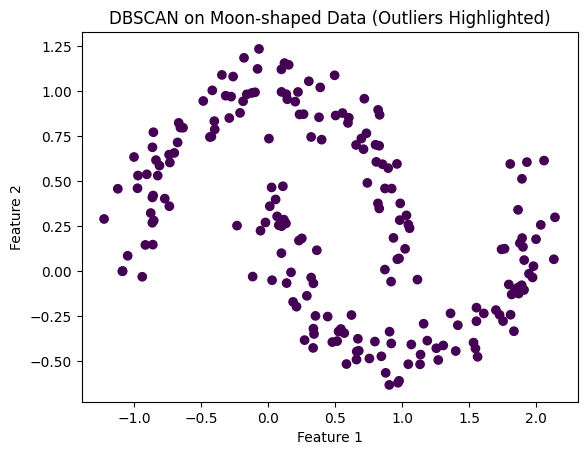

In [4]:
# Q8: DBSCAN on moon-shaped data with outlier detection

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Separate core points and outliers
outliers = labels == -1

# Plot clusters
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers])
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='x')

plt.title("DBSCAN on Moon-shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


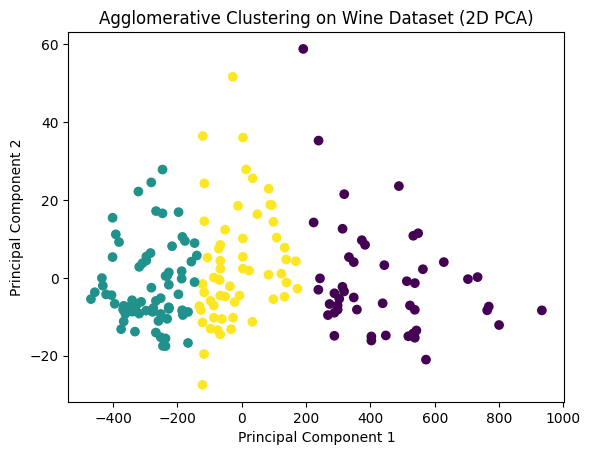

In [5]:
# Q9: PCA + Agglomerative Clustering on Wine Dataset

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load Wine dataset
data = load_wine()
X = data.data

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.show()


Q10. Customer Segmentation using Clustering in an E-commerce Company

To segment customers based on purchasing behavior, clustering is an effective unsupervised learning approach.

1. Clustering Algorithm Selection:
I would primarily use K-Means clustering because it works well on large datasets and produces easily interpretable clusters.
For identifying unusual customer behavior or outliers, DBSCAN can also be used as it can detect noise points automatically.

2. Data Preprocessing:
- Handle missing values by removing records with many missing entries or imputing values using mean or median.
- Encode categorical variables such as gender or location using label encoding or one-hot encoding.
- Apply feature scaling (StandardScaler or MinMaxScaler) to ensure all features contribute equally to distance calculations.

3. Determining the Number of Clusters:
- Use the Elbow Method to find the optimal number of clusters.
- Use the Silhouette Score to validate the quality of clustering.
- Combine domain knowledge from the marketing team to choose a meaningful number of customer segments.

4. Benefits to the Marketing Team:
- Enables personalized marketing and targeted promotions.
- Helps identify high-value customers and loyal segments.
- Improves customer retention and conversion rates.
- Allows efficient allocation of marketing budget.

Overall, clustering helps convert raw customer data into actionable insights, leading to data-driven marketing strategies.


In [6]:
# Q10: Customer Segmentation using K-Means Clustering (E-commerce Example)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample customer data
# Columns: Age, Annual Income, Spending Score, Online Visits
data = {
    'Age': [25, 34, 45, 23, 35, 52, 46, 29, 41, 38],
    'Annual_Income': [40, 60, 80, 30, 65, 90, 85, 50, 70, 68],
    'Spending_Score': [60, 55, 40, 70, 58, 35, 45, 65, 50, 52],
    'Online_Visits': [15, 10, 5, 20, 12, 4, 6, 18, 8, 9]
}

df = pd.DataFrame(data)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

# Print results
print("Customer Segments:")
print(df)

# Evaluate clustering
score = silhouette_score(X_scaled, labels)
print("\nSilhouette Score:", score)


Customer Segments:
   Age  Annual_Income  Spending_Score  Online_Visits  Cluster
0   25             40              60             15        0
1   34             60              55             10        1
2   45             80              40              5        2
3   23             30              70             20        0
4   35             65              58             12        1
5   52             90              35              4        2
6   46             85              45              6        2
7   29             50              65             18        0
8   41             70              50              8        1
9   38             68              52              9        1

Silhouette Score: 0.5487672215649767
